In [3]:
#################################################################
#Code for making maps of crystallinity of polymers
################################################################# 


"""

забить это в изначальный гесс для интерполяции
посмотреть среднее гало
корреляция формы гало и кристалличности
подгон пиков в игоре Voigt, первое приближение - гаусс.
подгон гало Pearson IV, но гало разное для кристаллических и не кристаллических сртуктур
индекс крисатлличности
на сплавленных образцах усреднить все, а не маску.
различие в положениях пиков?
сакс?


"""


import h5py
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import peakutils
import time

In [4]:
import numpy as np
mask = np.loadtxt("mask.txt", skiprows=1)
mask.shape

(56, 56)

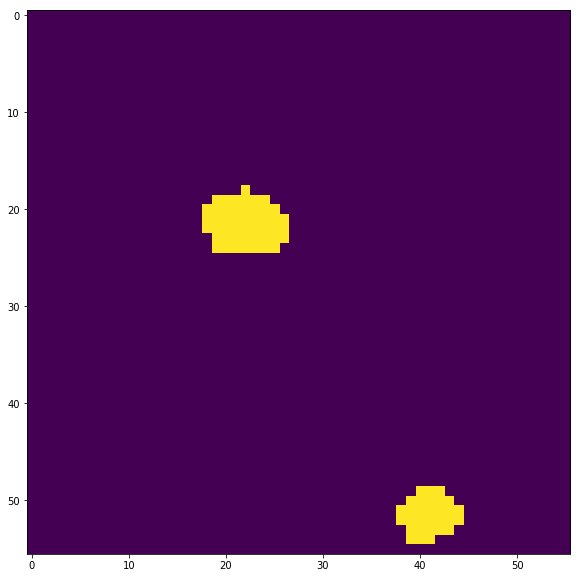

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.imsave("mask.png",mask, format="eps")
plt.savefig("MASK.PNG")

In [13]:
#Input parameters
file_name = "print_1416_4_155_master_pyFAI.h5" #file name
data_inner_directory = "data/data" #data path
map_width = 1 
min_ROI_q = 500 #region of interest in q  #TODO - размерность
max_ROI_q = 800
min_ROI_chi = 0 #region of interest in angle #TODO - размерность
max_ROI_chi = 720

In [14]:
#Opening the file
file = h5py.File(file_name, "r")
all_scans = file[data_inner_directory] 
map_width = int(all_scans.shape[0]**0.5) 
q_set = file["data/q"]
chi_set = file["data/chi"]

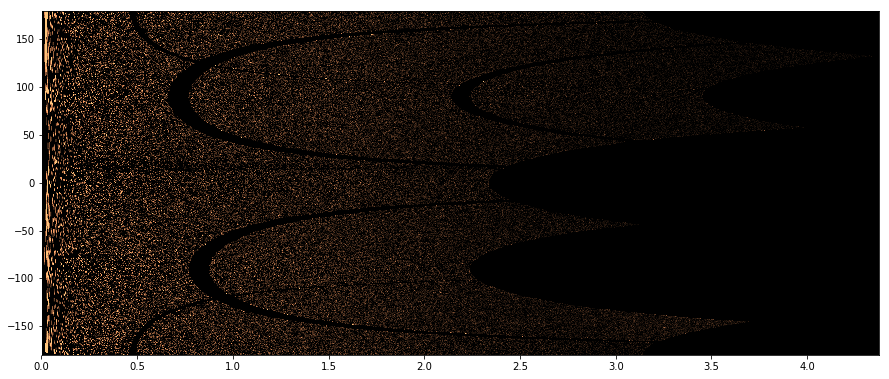

In [15]:
#Look at single scan and adjust ROI (region of interest) manually

# azim
scan = all_scans[3131] 
plt.figure(figsize=(15,10))
plt.imshow(scan, cmap="copper", clim = (0.0,1.0), extent = (q_set[0], q_set[-1], chi_set[0], chi_set[-1]), aspect = 0.005)

Profile width:  484
28.48666 28.62765183634474


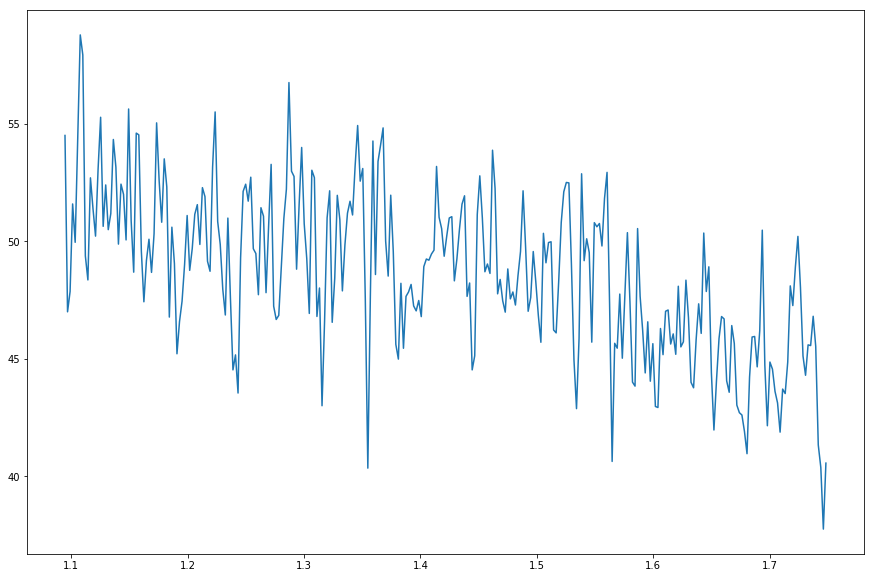

In [17]:
# Profile Image  

counter = 0 # profile counter
profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)

#This cycle sums all profiles which have no negative values (-10) inside ROI
for j in range (min_ROI_chi,max_ROI_chi):
    profile = scan[j]
    if -10 not in profile[min_ROI_q:max_ROI_q]:
        profile_sum += profile
        counter +=1
                
plt.figure(figsize=(15,10))
plt.plot(q_set[min_ROI_q:max_ROI_q],profile_sum[min_ROI_q:max_ROI_q]) #TODO - SAXS, корреляция с кристалличнстью. График lnx-lny
#требования к диплому
print ("Profile width: ",counter)
I =scipy.integrate.trapz(profile[min_ROI_q:max_ROI_q])
I_2 = sum(profile[min_ROI_q:max_ROI_q])
print(I, I_2)

H:\PROG\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


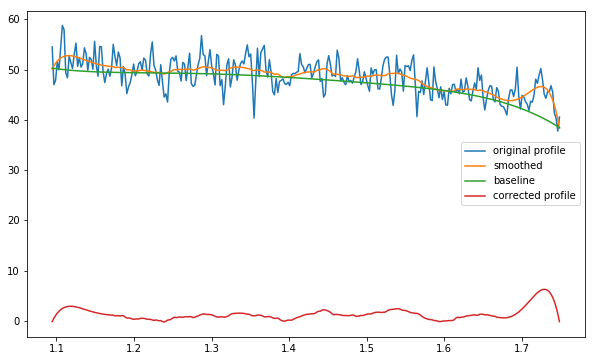

In [18]:
#Baseline correction

##############
#!!!In main code there is no smoothing yet!!!
##############

#TODO - smoothing the noise
#TODO - TUPLES
x = profile_sum[(slice(min_ROI_q,max_ROI_q),)]
smooth =scipy.signal.savgol_filter(x, 73, 5)
base = peakutils.baseline(smooth, 5, tol=1e-3, max_it = 100)


plt.figure(figsize=(10,6))
plt.plot(q_set[min_ROI_q:max_ROI_q], profile_sum[min_ROI_q:max_ROI_q], label = "original profile")
plt.plot(q_set[min_ROI_q:max_ROI_q], smooth, label = "smoothed")
plt.plot(q_set[min_ROI_q:max_ROI_q], base, label = "baseline")
plt.plot(q_set[min_ROI_q:max_ROI_q],smooth-base, label = "corrected profile")
plt.legend()

0 --- 2209.9508016109467 seconds --- 484
1 --- 2209.9508016109467 seconds --- 484
2 --- 2209.9508016109467 seconds --- 484
3 --- 2209.9508016109467 seconds --- 484
4 --- 2209.9508016109467 seconds --- 484
5 --- 2209.951801776886 seconds --- 484
6 --- 2209.951801776886 seconds --- 484
7 --- 2209.951801776886 seconds --- 484
8 --- 2209.951801776886 seconds --- 484
9 --- 2209.951801776886 seconds --- 484
10 --- 2209.951801776886 seconds --- 484
11 --- 2209.951801776886 seconds --- 484
12 --- 2209.951801776886 seconds --- 484
13 --- 2209.951801776886 seconds --- 484
14 --- 2209.951801776886 seconds --- 484
15 --- 2209.951801776886 seconds --- 484
16 --- 2209.9528002738953 seconds --- 484
17 --- 2209.9528002738953 seconds --- 484
18 --- 2209.9528002738953 seconds --- 484
19 --- 2209.9528002738953 seconds --- 484
20 --- 2209.9528002738953 seconds --- 484
21 --- 2209.9528002738953 seconds --- 484
22 --- 2209.9528002738953 seconds --- 484
23 --- 2209.9528002738953 seconds --- 484
24 --- 2209.9

387 --- 2210.261608362198 seconds --- 484
388 --- 2210.261608362198 seconds --- 484
389 --- 2210.261608362198 seconds --- 484
390 --- 2210.262607574463 seconds --- 484
391 --- 2210.262607574463 seconds --- 484
392 --- 2210.262607574463 seconds --- 484
393 --- 2210.262607574463 seconds --- 484
394 --- 2210.262607574463 seconds --- 484
395 --- 2210.262607574463 seconds --- 484
396 --- 2210.262607574463 seconds --- 484
397 --- 2210.262607574463 seconds --- 484
398 --- 2210.262607574463 seconds --- 484
399 --- 2210.262607574463 seconds --- 484
400 --- 2210.262607574463 seconds --- 484
401 --- 2210.262607574463 seconds --- 484
402 --- 2210.262607574463 seconds --- 484
403 --- 2210.262607574463 seconds --- 484
404 --- 2210.262607574463 seconds --- 484
405 --- 2210.262607574463 seconds --- 484
406 --- 2210.262607574463 seconds --- 484
407 --- 2210.2636070251465 seconds --- 484
408 --- 2210.2636070251465 seconds --- 484
409 --- 2210.2636070251465 seconds --- 484
410 --- 2210.2636070251465 seco

886 --- 2210.6233837604523 seconds --- 484
887 --- 2210.7513036727905 seconds --- 484
888 --- 2210.7513036727905 seconds --- 484
889 --- 2210.752303123474 seconds --- 484
890 --- 2210.752303123474 seconds --- 484
891 --- 2210.752303123474 seconds --- 484
892 --- 2210.752303123474 seconds --- 484
893 --- 2210.752303123474 seconds --- 484
894 --- 2210.752303123474 seconds --- 484
895 --- 2210.752303123474 seconds --- 484
896 --- 2210.752303123474 seconds --- 484
897 --- 2210.752303123474 seconds --- 484
898 --- 2210.752303123474 seconds --- 484
899 --- 2210.752303123474 seconds --- 484
900 --- 2210.7533032894135 seconds --- 484
901 --- 2210.7533032894135 seconds --- 484
902 --- 2210.7533032894135 seconds --- 484
903 --- 2210.7533032894135 seconds --- 484
904 --- 2210.7533032894135 seconds --- 484
905 --- 2210.7533032894135 seconds --- 484
906 --- 2210.7533032894135 seconds --- 484
907 --- 2210.7533032894135 seconds --- 484
908 --- 2210.7533032894135 seconds --- 484
909 --- 2210.753303289

1139 --- 2211.17404460907 seconds --- 720
1140 --- 2211.2220141887665 seconds --- 720
1141 --- 2211.2499947547913 seconds --- 720
1142 --- 2211.275979042053 seconds --- 720
1143 --- 2211.299963235855 seconds --- 720
1144 --- 2211.324949502945 seconds --- 720
1145 --- 2211.324949502945 seconds --- 720
1146 --- 2211.324949502945 seconds --- 720
1147 --- 2211.325947523117 seconds --- 720
1148 --- 2211.325947523117 seconds --- 720
1149 --- 2211.325947523117 seconds --- 720
1150 --- 2211.325947523117 seconds --- 720
1151 --- 2211.325947523117 seconds --- 720
1152 --- 2211.325947523117 seconds --- 720
1153 --- 2211.325947523117 seconds --- 720
1154 --- 2211.325947523117 seconds --- 720
1155 --- 2211.325947523117 seconds --- 720
1156 --- 2211.325947523117 seconds --- 720
1157 --- 2211.325947523117 seconds --- 720
1158 --- 2211.325947523117 seconds --- 720
1159 --- 2211.325947523117 seconds --- 720
1160 --- 2211.3269464969635 seconds --- 720
1161 --- 2211.3269464969635 seconds --- 720
1162 ---

1364 --- 2212.11545753479 seconds --- 720
1365 --- 2212.1914110183716 seconds --- 720
1366 --- 2212.279356479645 seconds --- 720
1367 --- 2212.328325510025 seconds --- 720
1368 --- 2212.3693022727966 seconds --- 720
1369 --- 2212.37030172348 seconds --- 720
1370 --- 2212.37030172348 seconds --- 720
1371 --- 2212.37030172348 seconds --- 720
1372 --- 2212.37030172348 seconds --- 720
1373 --- 2212.37030172348 seconds --- 720
1374 --- 2212.37030172348 seconds --- 720
1375 --- 2212.37030172348 seconds --- 720
1376 --- 2212.37030172348 seconds --- 720
1377 --- 2212.37030172348 seconds --- 720
1378 --- 2212.37030172348 seconds --- 720
1379 --- 2212.37030172348 seconds --- 720
1380 --- 2212.37030172348 seconds --- 720
1381 --- 2212.37030172348 seconds --- 720
1382 --- 2212.37030172348 seconds --- 720
1383 --- 2212.37030172348 seconds --- 720
1384 --- 2212.37030172348 seconds --- 720
1385 --- 2212.3712997436523 seconds --- 720
1386 --- 2212.3712997436523 seconds --- 720
1387 --- 2212.3712997436

1718 --- 2212.6941001415253 seconds --- 720
1719 --- 2212.8290157318115 seconds --- 720
1720 --- 2212.8290157318115 seconds --- 720
1721 --- 2212.8290157318115 seconds --- 720
1722 --- 2212.8300144672394 seconds --- 720
1723 --- 2212.8300144672394 seconds --- 720
1724 --- 2212.8300144672394 seconds --- 720
1725 --- 2212.8300144672394 seconds --- 720
1726 --- 2212.8300144672394 seconds --- 720
1727 --- 2212.8300144672394 seconds --- 720
1728 --- 2212.8300144672394 seconds --- 720
1729 --- 2212.8300144672394 seconds --- 720
1730 --- 2212.8300144672394 seconds --- 720
1731 --- 2212.8300144672394 seconds --- 720
1732 --- 2212.8300144672394 seconds --- 720
1733 --- 2212.8300144672394 seconds --- 720
1734 --- 2212.8310136795044 seconds --- 720
1735 --- 2212.8310136795044 seconds --- 720
1736 --- 2212.8310136795044 seconds --- 720
1737 --- 2212.8310136795044 seconds --- 720
1738 --- 2212.8310136795044 seconds --- 720
1739 --- 2212.8310136795044 seconds --- 720
1740 --- 2212.8310136795044 seco

2051 --- 2212.97292637825 seconds --- 720
2052 --- 2213.101845741272 seconds --- 720
2053 --- 2213.101845741272 seconds --- 720
2054 --- 2213.101845741272 seconds --- 720
2055 --- 2213.101845741272 seconds --- 720
2056 --- 2213.101845741272 seconds --- 720
2057 --- 2213.101845741272 seconds --- 720
2058 --- 2213.101845741272 seconds --- 720
2059 --- 2213.101845741272 seconds --- 720
2060 --- 2213.101845741272 seconds --- 720
2061 --- 2213.101845741272 seconds --- 720
2062 --- 2213.101845741272 seconds --- 720
2063 --- 2213.101845741272 seconds --- 720
2064 --- 2213.101845741272 seconds --- 720
2065 --- 2213.102845430374 seconds --- 720
2066 --- 2213.102845430374 seconds --- 720
2067 --- 2213.102845430374 seconds --- 720
2068 --- 2213.102845430374 seconds --- 720
2069 --- 2213.102845430374 seconds --- 720
2070 --- 2213.102845430374 seconds --- 720
2071 --- 2213.102845430374 seconds --- 720
2072 --- 2213.102845430374 seconds --- 720
2073 --- 2213.102845430374 seconds --- 720
2074 --- 221

2293 --- 2213.578552722931 seconds --- 720
2294 --- 2213.604534626007 seconds --- 720
2295 --- 2213.604534626007 seconds --- 720
2296 --- 2213.604534626007 seconds --- 720
2297 --- 2213.604534626007 seconds --- 720
2298 --- 2213.604534626007 seconds --- 720
2299 --- 2213.604534626007 seconds --- 720
2300 --- 2213.604534626007 seconds --- 720
2301 --- 2213.604534626007 seconds --- 720
2302 --- 2213.604534626007 seconds --- 720
2303 --- 2213.604534626007 seconds --- 720
2304 --- 2213.604534626007 seconds --- 720
2305 --- 2213.604534626007 seconds --- 720
2306 --- 2213.6055347919464 seconds --- 720
2307 --- 2213.6055347919464 seconds --- 720
2308 --- 2213.6055347919464 seconds --- 720
2309 --- 2213.6055347919464 seconds --- 720
2310 --- 2213.6055347919464 seconds --- 720
2311 --- 2213.6055347919464 seconds --- 720
2312 --- 2213.6055347919464 seconds --- 720
2313 --- 2213.606533765793 seconds --- 720
2314 --- 2213.606533765793 seconds --- 720
2315 --- 2213.606533765793 seconds --- 720
2316

2717 --- 2214.2481348514557 seconds --- 720
2718 --- 2214.382051229477 seconds --- 720
2719 --- 2214.382051229477 seconds --- 720
2720 --- 2214.382051229477 seconds --- 720
2721 --- 2214.382051229477 seconds --- 720
2722 --- 2214.382051229477 seconds --- 720
2723 --- 2214.382051229477 seconds --- 720
2724 --- 2214.382051229477 seconds --- 720
2725 --- 2214.382051229477 seconds --- 720
2726 --- 2214.382051229477 seconds --- 720
2727 --- 2214.382051229477 seconds --- 720
2728 --- 2214.382051229477 seconds --- 720
2729 --- 2214.382051229477 seconds --- 720
2730 --- 2214.3830506801605 seconds --- 720
2731 --- 2214.3830506801605 seconds --- 720
2732 --- 2214.3830506801605 seconds --- 720
2733 --- 2214.3830506801605 seconds --- 720
2734 --- 2214.3830506801605 seconds --- 720
2735 --- 2214.3830506801605 seconds --- 720
2736 --- 2214.3830506801605 seconds --- 720
2737 --- 2214.3830506801605 seconds --- 720
2738 --- 2214.3830506801605 seconds --- 720
2739 --- 2214.3830506801605 seconds --- 720


3050 --- 2214.513970375061 seconds --- 720
3051 --- 2214.665876150131 seconds --- 720
3052 --- 2214.665876150131 seconds --- 720
3053 --- 2214.665876150131 seconds --- 720
3054 --- 2214.665876150131 seconds --- 720
3055 --- 2214.665876150131 seconds --- 720
3056 --- 2214.665876150131 seconds --- 720
3057 --- 2214.665876150131 seconds --- 720
3058 --- 2214.665876150131 seconds --- 720
3059 --- 2214.665876150131 seconds --- 720
3060 --- 2214.665876150131 seconds --- 720
3061 --- 2214.665876150131 seconds --- 720
3062 --- 2214.665876150131 seconds --- 720
3063 --- 2214.666874408722 seconds --- 720
3064 --- 2214.666874408722 seconds --- 720
3065 --- 2214.666874408722 seconds --- 720
3066 --- 2214.666874408722 seconds --- 720
3067 --- 2214.666874408722 seconds --- 720
3068 --- 2214.666874408722 seconds --- 720
3069 --- 2214.666874408722 seconds --- 720
3070 --- 2214.666874408722 seconds --- 720
3071 --- 2214.666874408722 seconds --- 720
3072 --- 2214.666874408722 seconds --- 720
3073 --- 22

78

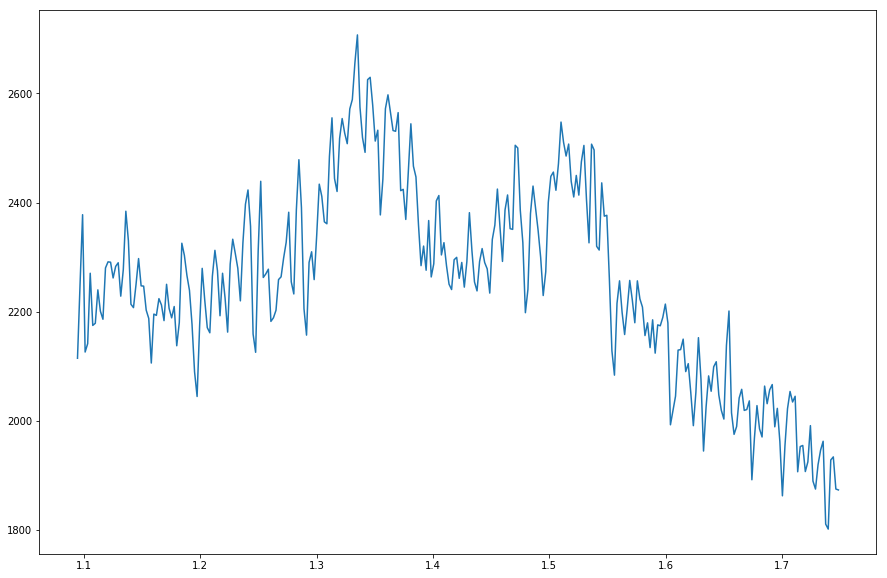

In [19]:
#Mapping


start_time = time.time() #time counter
map_data = np.zeros((map_width,map_width), dtype=np.float32) 

for i in range(map_width**2):
        current_scan = all_scans[i]   
        profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)
        
        for j in range (min_ROI_chi,max_ROI_chi):
            profile = current_scan[j]           
            if (-10 not in profile[min_ROI_q:max_ROI_q]):
                profile_sum += profile

        #base = peakutils.baseline(profile[min_ROI_q:max_ROI_q], 5, tol=1e-3, max_it = 100)
        I =scipy.integrate.trapz(profile[min_ROI_q:max_ROI_q])*mask[i%map_width][i//map_width]
        x = int(i%map_width)
        y = int(i//map_width)
        
        map_data[y][x]=I
        print(i,"--- %s seconds ---" % (time.time() - start_time))

0 --- 0.13568592071533203 seconds ---
1 --- 0.3067026138305664 seconds ---
2 --- 0.46002769470214844 seconds ---
3 --- 0.6419079303741455 seconds ---
4 --- 0.6893250942230225 seconds ---
5 --- 0.8205182552337646 seconds ---
6 --- 0.9156575202941895 seconds ---
7 --- 0.9538602828979492 seconds ---
8 --- 1.0607633590698242 seconds ---
9 --- 1.158055305480957 seconds ---
10 --- 1.2943556308746338 seconds ---
11 --- 1.4145245552062988 seconds ---
12 --- 1.5370874404907227 seconds ---
13 --- 1.6894030570983887 seconds ---
14 --- 1.8333227634429932 seconds ---
15 --- 1.9278197288513184 seconds ---
16 --- 2.07185435295105 seconds ---
17 --- 2.197511672973633 seconds ---
18 --- 2.285430669784546 seconds ---
19 --- 2.4455313682556152 seconds ---
20 --- 2.5112993717193604 seconds ---
21 --- 2.68556809425354 seconds ---
22 --- 2.7707762718200684 seconds ---
23 --- 2.9003677368164062 seconds ---
24 --- 3.03674054145813 seconds ---
25 --- 3.1836676597595215 seconds ---
26 --- 3.332900285720825 seco

216 --- 34.02407217025757 seconds ---
217 --- 34.17979288101196 seconds ---
218 --- 34.38848519325256 seconds ---
219 --- 34.476693868637085 seconds ---
220 --- 34.73364567756653 seconds ---
221 --- 34.89589309692383 seconds ---
222 --- 35.10882377624512 seconds ---
223 --- 35.177955627441406 seconds ---
224 --- 35.383553981781006 seconds ---
225 --- 35.55565810203552 seconds ---
226 --- 35.74310326576233 seconds ---
227 --- 35.951260805130005 seconds ---
228 --- 36.188270807266235 seconds ---
229 --- 36.29596519470215 seconds ---
230 --- 36.622761249542236 seconds ---
231 --- 36.715702295303345 seconds ---
232 --- 36.92527890205383 seconds ---
233 --- 37.19939088821411 seconds ---
234 --- 37.36739635467529 seconds ---
235 --- 37.59437680244446 seconds ---
236 --- 37.6812207698822 seconds ---
237 --- 37.895636320114136 seconds ---
238 --- 38.176170349121094 seconds ---
239 --- 38.26657676696777 seconds ---
240 --- 38.4702410697937 seconds ---
241 --- 38.75940990447998 seconds ---
242 -

432 --- 76.5114631652832 seconds ---
433 --- 76.81381869316101 seconds ---
434 --- 76.95675158500671 seconds ---
435 --- 77.12864661216736 seconds ---
436 --- 77.23058342933655 seconds ---
437 --- 77.40906190872192 seconds ---
438 --- 77.6758201122284 seconds ---
439 --- 77.86384987831116 seconds ---
440 --- 78.1217942237854 seconds ---
441 --- 78.30213618278503 seconds ---
442 --- 78.4980297088623 seconds ---
443 --- 78.65493178367615 seconds ---
444 --- 78.7806568145752 seconds ---
445 --- 79.08482313156128 seconds ---
446 --- 79.23572874069214 seconds ---
447 --- 79.45359492301941 seconds ---
448 --- 79.5495343208313 seconds ---
449 --- 79.75040555000305 seconds ---
450 --- 79.95618057250977 seconds ---
451 --- 80.05245637893677 seconds ---
452 --- 80.27217173576355 seconds ---
453 --- 80.32701659202576 seconds ---
454 --- 80.52532768249512 seconds ---
455 --- 80.61829113960266 seconds ---
456 --- 80.90219163894653 seconds ---
457 --- 81.1073842048645 seconds ---
458 --- 81.28188872

647 --- 116.54080247879028 seconds ---
648 --- 116.76853156089783 seconds ---
649 --- 116.85040307044983 seconds ---
650 --- 117.04872369766235 seconds ---
651 --- 117.22048592567444 seconds ---
652 --- 117.52665090560913 seconds ---
653 --- 117.71871829032898 seconds ---
654 --- 117.80867600440979 seconds ---
655 --- 117.99352025985718 seconds ---
656 --- 118.17258524894714 seconds ---
657 --- 118.26247501373291 seconds ---
658 --- 118.52160406112671 seconds ---
659 --- 118.9618673324585 seconds ---
660 --- 119.22775983810425 seconds ---
661 --- 119.4568567276001 seconds ---
662 --- 119.62559771537781 seconds ---
663 --- 119.9564642906189 seconds ---
664 --- 120.15415334701538 seconds ---
665 --- 120.3763427734375 seconds ---
666 --- 120.61050033569336 seconds ---
667 --- 120.95046949386597 seconds ---
668 --- 121.17422318458557 seconds ---
669 --- 121.50997257232666 seconds ---
670 --- 121.65861320495605 seconds ---
671 --- 121.93650150299072 seconds ---
672 --- 122.03144216537476 se

859 --- 158.3170928955078 seconds ---
860 --- 158.53819823265076 seconds ---
861 --- 158.6872203350067 seconds ---
862 --- 158.85530185699463 seconds ---
863 --- 158.965806722641 seconds ---
864 --- 159.18923330307007 seconds ---
865 --- 159.44166779518127 seconds ---
866 --- 159.54424858093262 seconds ---
867 --- 159.76726412773132 seconds ---
868 --- 159.90417575836182 seconds ---
869 --- 160.08619856834412 seconds ---
870 --- 160.16019320487976 seconds ---
871 --- 160.3126790523529 seconds ---
872 --- 160.537175655365 seconds ---
873 --- 160.63036561012268 seconds ---
874 --- 160.85917854309082 seconds ---
875 --- 160.92376685142517 seconds ---
876 --- 161.10444450378418 seconds ---
877 --- 161.22482991218567 seconds ---
878 --- 161.47467470169067 seconds ---
879 --- 161.7291624546051 seconds ---
880 --- 161.877055644989 seconds ---
881 --- 162.01498794555664 seconds ---
882 --- 162.12891697883606 seconds ---
883 --- 162.3028085231781 seconds ---
884 --- 162.5197205543518 seconds --

1069 --- 198.99309730529785 seconds ---
1070 --- 199.29656958580017 seconds ---
1071 --- 199.629549741745 seconds ---
1072 --- 199.8699655532837 seconds ---
1073 --- 200.1915476322174 seconds ---
1074 --- 200.42594861984253 seconds ---
1075 --- 200.5303852558136 seconds ---
1076 --- 200.77008438110352 seconds ---
1077 --- 201.00219082832336 seconds ---
1078 --- 201.29075074195862 seconds ---
1079 --- 201.69728589057922 seconds ---
1080 --- 201.9645528793335 seconds ---
1081 --- 202.1420431137085 seconds ---
1082 --- 202.43993496894836 seconds ---
1083 --- 202.7161259651184 seconds ---
1084 --- 202.94033217430115 seconds ---
1085 --- 203.17244291305542 seconds ---
1086 --- 203.26513075828552 seconds ---
1087 --- 203.48981189727783 seconds ---
1088 --- 203.55732202529907 seconds ---
1089 --- 203.786372423172 seconds ---
1090 --- 204.01486563682556 seconds ---
1091 --- 204.21440744400024 seconds ---
1092 --- 204.36952471733093 seconds ---
1093 --- 204.6038453578949 seconds ---
1094 --- 20

1276 --- 244.1662814617157 seconds ---
1277 --- 244.41081357002258 seconds ---
1278 --- 244.5687005519867 seconds ---
1279 --- 244.77033853530884 seconds ---
1280 --- 244.9459445476532 seconds ---
1281 --- 245.16141486167908 seconds ---
1282 --- 245.37224054336548 seconds ---
1283 --- 245.61010718345642 seconds ---
1284 --- 245.79013013839722 seconds ---
1285 --- 246.00715517997742 seconds ---
1286 --- 246.16158747673035 seconds ---
1287 --- 246.3368456363678 seconds ---
1288 --- 246.5710277557373 seconds ---
1289 --- 246.757061958313 seconds ---
1290 --- 246.90660858154297 seconds ---
1291 --- 247.11206984519958 seconds ---
1292 --- 247.27477169036865 seconds ---
1293 --- 247.44974493980408 seconds ---
1294 --- 247.60493350028992 seconds ---
1295 --- 247.84000301361084 seconds ---
1296 --- 248.07502031326294 seconds ---
1297 --- 248.28604745864868 seconds ---
1298 --- 248.47561025619507 seconds ---
1299 --- 248.71375370025635 seconds ---
1300 --- 248.82277178764343 seconds ---
1301 --

1484 --- 278.2897491455078 seconds ---
1485 --- 278.4007213115692 seconds ---
1486 --- 278.55246448516846 seconds ---
1487 --- 278.6759502887726 seconds ---
1488 --- 278.8283896446228 seconds ---
1489 --- 279.00072145462036 seconds ---
1490 --- 279.1670126914978 seconds ---
1491 --- 279.30218839645386 seconds ---
1492 --- 279.64022064208984 seconds ---
1493 --- 279.6652011871338 seconds ---
1494 --- 279.8152697086334 seconds ---
1495 --- 279.9665148258209 seconds ---
1496 --- 280.1250126361847 seconds ---
1497 --- 280.2310779094696 seconds ---
1498 --- 280.38205432891846 seconds ---
1499 --- 280.5091161727905 seconds ---
1500 --- 280.67610335350037 seconds ---
1501 --- 280.8329977989197 seconds ---
1502 --- 280.96112632751465 seconds ---
1503 --- 281.1091339588165 seconds ---
1504 --- 281.28009271621704 seconds ---
1505 --- 281.441125869751 seconds ---
1506 --- 281.6111295223236 seconds ---
1507 --- 281.74311780929565 seconds ---
1508 --- 281.9131214618683 seconds ---
1509 --- 282.0894

1693 --- 310.71197032928467 seconds ---
1694 --- 310.8608546257019 seconds ---
1695 --- 311.0150179862976 seconds ---
1696 --- 311.19027733802795 seconds ---
1697 --- 311.29382061958313 seconds ---
1698 --- 311.4660761356354 seconds ---
1699 --- 311.6178321838379 seconds ---
1700 --- 311.75925493240356 seconds ---
1701 --- 311.9405663013458 seconds ---
1702 --- 312.11671137809753 seconds ---
1703 --- 312.2844660282135 seconds ---
1704 --- 312.4528384208679 seconds ---
1705 --- 312.63386130332947 seconds ---
1706 --- 312.8149814605713 seconds ---
1707 --- 312.99400877952576 seconds ---
1708 --- 313.13992404937744 seconds ---
1709 --- 313.294180393219 seconds ---
1710 --- 313.4833652973175 seconds ---
1711 --- 313.6197588443756 seconds ---
1712 --- 313.7784218788147 seconds ---
1713 --- 313.8440291881561 seconds ---
1714 --- 314.0165174007416 seconds ---
1715 --- 314.1949088573456 seconds ---
1716 --- 314.33472514152527 seconds ---
1717 --- 314.4929213523865 seconds ---
1718 --- 314.6462

1903 --- 339.7039477825165 seconds ---
1904 --- 339.84094738960266 seconds ---
1905 --- 339.9229838848114 seconds ---
1906 --- 339.9769790172577 seconds ---
1907 --- 340.0639843940735 seconds ---
1908 --- 340.20271611213684 seconds ---
1909 --- 340.3000478744507 seconds ---
1910 --- 340.34007263183594 seconds ---
1911 --- 340.47518372535706 seconds ---
1912 --- 340.55550837516785 seconds ---
1913 --- 340.64907813072205 seconds ---
1914 --- 340.77973914146423 seconds ---
1915 --- 340.94275403022766 seconds ---
1916 --- 341.08465909957886 seconds ---
1917 --- 341.23053908348083 seconds ---
1918 --- 341.4458577632904 seconds ---
1919 --- 341.58625078201294 seconds ---
1920 --- 341.7330439090729 seconds ---
1921 --- 341.847026348114 seconds ---
1922 --- 341.98286962509155 seconds ---
1923 --- 342.14383363723755 seconds ---
1924 --- 342.2723968029022 seconds ---
1925 --- 342.390750169754 seconds ---
1926 --- 342.5189571380615 seconds ---
1927 --- 342.61432695388794 seconds ---
1928 --- 342.

2112 --- 364.98040676116943 seconds ---
2113 --- 365.1140286922455 seconds ---
2114 --- 365.27164363861084 seconds ---
2115 --- 365.4177179336548 seconds ---
2116 --- 365.771502494812 seconds ---
2117 --- 365.8835458755493 seconds ---
2118 --- 366.19610595703125 seconds ---
2119 --- 366.62833642959595 seconds ---
2120 --- 366.74526143074036 seconds ---
2121 --- 367.267329454422 seconds ---
2122 --- 367.70927906036377 seconds ---
2123 --- 368.07235860824585 seconds ---
2124 --- 368.4436490535736 seconds ---
2125 --- 368.7286503314972 seconds ---
2126 --- 369.03381991386414 seconds ---
2127 --- 369.30123591423035 seconds ---
2128 --- 369.62938833236694 seconds ---
2129 --- 369.915810585022 seconds ---
2130 --- 370.2013249397278 seconds ---
2131 --- 370.4976816177368 seconds ---
2132 --- 370.7795321941376 seconds ---
2133 --- 371.0836091041565 seconds ---
2134 --- 371.4008629322052 seconds ---
2135 --- 371.61056756973267 seconds ---
2136 --- 371.94838762283325 seconds ---
2137 --- 372.183

2323 --- 398.40654826164246 seconds ---
2324 --- 398.4545557498932 seconds ---
2325 --- 398.5866949558258 seconds ---
2326 --- 398.67777585983276 seconds ---
2327 --- 398.7346622943878 seconds ---
2328 --- 398.8383047580719 seconds ---
2329 --- 398.9583659172058 seconds ---
2330 --- 399.03434133529663 seconds ---
2331 --- 399.27147364616394 seconds ---
2332 --- 399.2944576740265 seconds ---
2333 --- 399.38927483558655 seconds ---
2334 --- 399.45329189300537 seconds ---
2335 --- 399.58228278160095 seconds ---
2336 --- 399.65091037750244 seconds ---
2337 --- 399.7669360637665 seconds ---
2338 --- 399.8208866119385 seconds ---
2339 --- 399.97169947624207 seconds ---
2340 --- 400.03108048439026 seconds ---
2341 --- 400.1575312614441 seconds ---
2342 --- 400.2612409591675 seconds ---
2343 --- 400.3318929672241 seconds ---
2344 --- 400.417268037796 seconds ---
2345 --- 400.5072593688965 seconds ---
2346 --- 400.7265474796295 seconds ---
2347 --- 400.9580900669098 seconds ---
2348 --- 401.010

2534 --- 420.94568061828613 seconds ---
2535 --- 421.05467677116394 seconds ---
2536 --- 421.2045636177063 seconds ---
2537 --- 421.2495336532593 seconds ---
2538 --- 421.41459369659424 seconds ---
2539 --- 421.5086030960083 seconds ---
2540 --- 421.6556875705719 seconds ---
2541 --- 421.7725684642792 seconds ---
2542 --- 421.9505982398987 seconds ---
2543 --- 422.07983350753784 seconds ---
2544 --- 422.24799156188965 seconds ---
2545 --- 422.34538888931274 seconds ---
2546 --- 422.50248742103577 seconds ---
2547 --- 422.6458144187927 seconds ---
2548 --- 422.78973627090454 seconds ---
2549 --- 422.9106237888336 seconds ---
2550 --- 423.03918743133545 seconds ---
2551 --- 423.18760681152344 seconds ---
2552 --- 423.33452582359314 seconds ---
2553 --- 423.4362213611603 seconds ---
2554 --- 423.57817006111145 seconds ---
2555 --- 423.7616193294525 seconds ---
2556 --- 423.88004446029663 seconds ---
2557 --- 423.9201560020447 seconds ---
2558 --- 424.09271264076233 seconds ---
2559 --- 42

2743 --- 444.3320143222809 seconds ---
2744 --- 444.4126000404358 seconds ---
2745 --- 444.51325941085815 seconds ---
2746 --- 444.82030510902405 seconds ---
2747 --- 444.8472845554352 seconds ---
2748 --- 444.99405670166016 seconds ---
2749 --- 445.14719700813293 seconds ---
2750 --- 445.1935465335846 seconds ---
2751 --- 445.50607919692993 seconds ---
2752 --- 445.5993609428406 seconds ---
2753 --- 445.7242839336395 seconds ---
2754 --- 445.81528973579407 seconds ---
2755 --- 445.92027020454407 seconds ---
2756 --- 446.0223128795624 seconds ---
2757 --- 446.12628269195557 seconds ---
2758 --- 446.1622865200043 seconds ---
2759 --- 446.3155794143677 seconds ---
2760 --- 446.41343235969543 seconds ---
2761 --- 446.51438760757446 seconds ---
2762 --- 446.5563590526581 seconds ---
2763 --- 446.6828193664551 seconds ---
2764 --- 446.79048800468445 seconds ---
2765 --- 446.9185891151428 seconds ---
2766 --- 446.9674971103668 seconds ---
2767 --- 447.11330223083496 seconds ---
2768 --- 447.

2953 --- 469.9014217853546 seconds ---
2954 --- 470.0117738246918 seconds ---
2955 --- 470.0497748851776 seconds ---
2956 --- 470.16458678245544 seconds ---
2957 --- 470.28003668785095 seconds ---
2958 --- 470.3490297794342 seconds ---
2959 --- 470.435396194458 seconds ---
2960 --- 470.5331814289093 seconds ---
2961 --- 470.6413049697876 seconds ---
2962 --- 470.73217701911926 seconds ---
2963 --- 470.7892653942108 seconds ---
2964 --- 470.91619181632996 seconds ---
2965 --- 470.98288559913635 seconds ---
2966 --- 471.1603207588196 seconds ---
2967 --- 471.2074453830719 seconds ---
2968 --- 471.3645701408386 seconds ---
2969 --- 471.4637041091919 seconds ---
2970 --- 471.5122549533844 seconds ---
2971 --- 471.62844157218933 seconds ---
2972 --- 471.6998040676117 seconds ---
2973 --- 471.7896263599396 seconds ---
2974 --- 471.96881556510925 seconds ---
2975 --- 472.02203154563904 seconds ---
2976 --- 472.15064573287964 seconds ---
2977 --- 472.258177280426 seconds ---
2978 --- 472.32917

<Figure size 1080x1080 with 0 Axes>

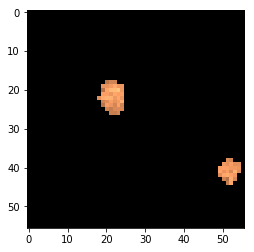

<Figure size 1080x1080 with 0 Axes>

In [20]:
#Final picture

plt.imshow(map_data, cmap = "copper", interpolation = 'nearest')
plt.figure(figsize=(15,15))

In [26]:
#Saving
plt.imsave("1416_masked_q_{}-{}_chi_{}-{}.eps".format(min_ROI_q, max_ROI_q, min_ROI_chi, max_ROI_chi), map_data, format="eps", cmap = "copper")

0 --- 1239.4248135089874 seconds ---


In [48]:
file.close()

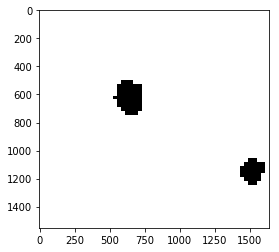